### In this tutorial, you will perform both regression and classification tasks using [scikit-learn](https://scikit-learn.org/stable/getting_started.html). Before starting, make sure you have set up your conda environment according to the instructions provided in Week 1.

In [2]:
!pip install numpy matplotlib scikit-learn --upgrade --quiet

In [1]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set plot font size for better visibility
font = {'size': 16}
matplotlib.rc('font', **font)

### ---------------------
### 1. Generate synthetic data
### ---------------------

In [3]:
def generate_hdd_data(N, noise=False):
    """
    Generate synthetic data for hard disk drive (HDD) failure.
    The breaking chance increases linearly with age.
    """
    np.random.seed(42)  # for reproducibility
    hdd_age = np.linspace(0, 40, N).reshape(-1, 1)  # ages from 0 to 40
    breaking_chance = 2.4 * hdd_age + 2  # linear relation

    if noise:
        measurement_noise = np.random.rand(N, 1) * 15  # add some noise
        breaking_chance = np.minimum(100, breaking_chance + measurement_noise)

    return hdd_age, breaking_chance

# Generate data
N = 40
X, y = generate_hdd_data(N, noise=True)

### ---------------------
### 2. Visualize the data
### ---------------------

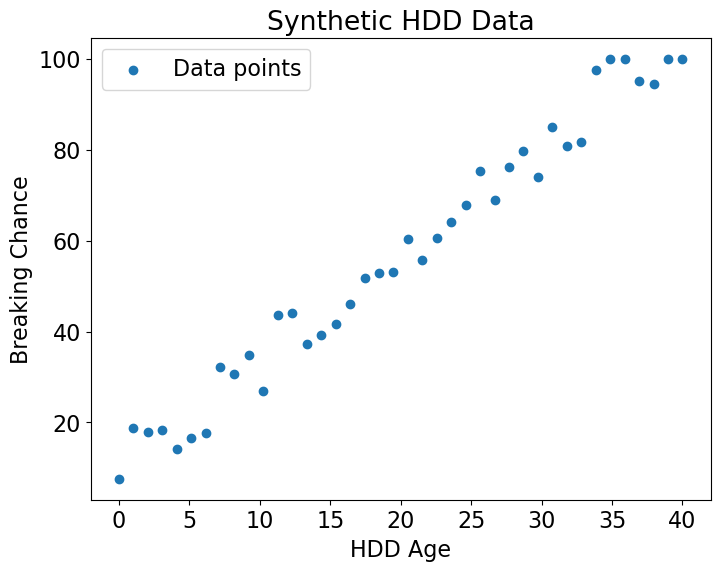

In [5]:

plt.figure(figsize=(8,6))
plt.scatter(X, y, label="Data points")
plt.title("Synthetic HDD Data")
plt.xlabel("HDD Age")
plt.ylabel("Breaking Chance")
plt.legend()
plt.show()

### ---------------------
### 3. Split data into train and test sets
### ---------------------

#### Why Cross-Validation?

- When you split into train/test once, the evaluation depends on that random split.
- Cross-validation splits the data into *k* folds (e.g. 5), trains on 4 folds and tests on 1, rotating through all folds.
- You get multiple evaluations, giving you a better estimate of how your model will perform on unseen data.
- Especially important for small datasets.

---

####  Do we need Cross-Validation for Regression?

**Yes!** Any time you train any model (classification or regression), cross-validation helps:

- Avoid overfitting
- Provide more reliable performance metrics
- Detect whether your model works well generally, or just on one lucky split

---

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### ---------------------
### 4. Train linear regression model
### ---------------------

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### ---------------------
### 5. Evaluate the model
### ---------------------

#### How to evaluate Regression?

The most common metrics:

##### MSE (Mean Squared Error)

- Penalizes large errors more.
  
MSE = (1 / N) * sum ( (y_i - y_hat_i)^2 )


##### MAE (Mean Absolute Error)

- More robust to outliers.

MAE = (1 / N) * sum ( |y_i - y_hat_i| )

##### R² (Coefficient of Determination)

- Proportion of variance explained by the model.
- Values close to 1 are better.


In [ ]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluation metrics
def evaluate(y_true, y_pred, dataset=""):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset} MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}")

evaluate(y_train, y_train_pred, "Train")
evaluate(y_test, y_test_pred, "Test")

### Exercise: Predicting Fuel Efficiency with Linear Regression

**Problem Description**
You are given real-world data on automobile fuel efficiency. Each record contains information about a car’s technical specifications and its fuel efficiency measured in miles per gallon (MPG).
In this exercise, you will build a linear regression model to predict a car’s fuel efficiency (MPG) based on its engine displacement (displacement).

#### Your Tasks
1. Load the dataset using fetch_openml:

    ```python
    from sklearn.datasets import fetch_openml
    data = fetch_openml("autoMpg", version=1, as_frame=True)
    df = data.frame
    ```
    
2. Extract:
- Features (X): use only the displacement column.
- Target (y): use the target values provided by data.target.
3. Visualize the data:
Create a scatter plot showing displacement (engine size) vs MPG (fuel efficiency).
4. Split the data into train and test sets:
Use 80% of the data for training and 20% for testing.
5️. Train a Linear Regression model to predict MPG from displacement.
6. Evaluate your model using:
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- R² score
7️. Visualize the model predictions:
- Plot the test data points.
- Plot the predicted values from your model.

In [31]:
from sklearn.datasets import fetch_openml

# Load dataset
data = fetch_openml("autoMpg", version=1, as_frame=True)
df = data.frame

# X = displacement column (feature)
X = df[['displacement']].values

# y = target (mpg) directly from data.target
y = data.target.values

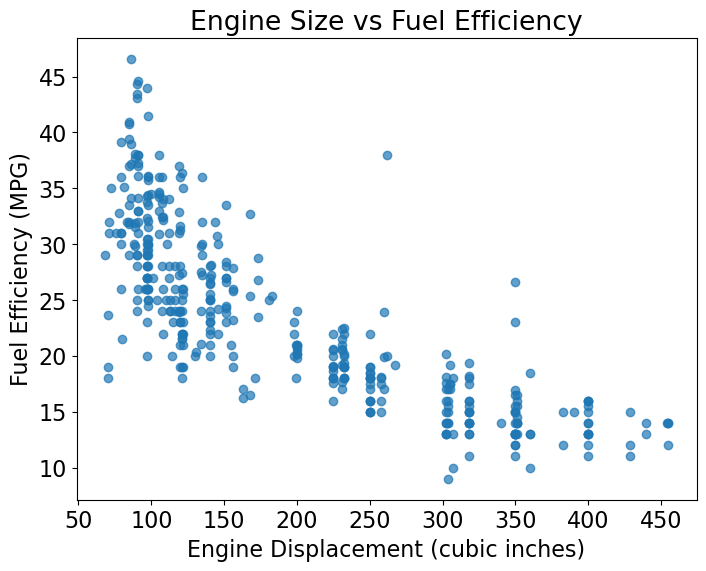

Mean Squared Error (MSE): 18.10
Mean Absolute Error (MAE): 3.39
R² Score: 0.663


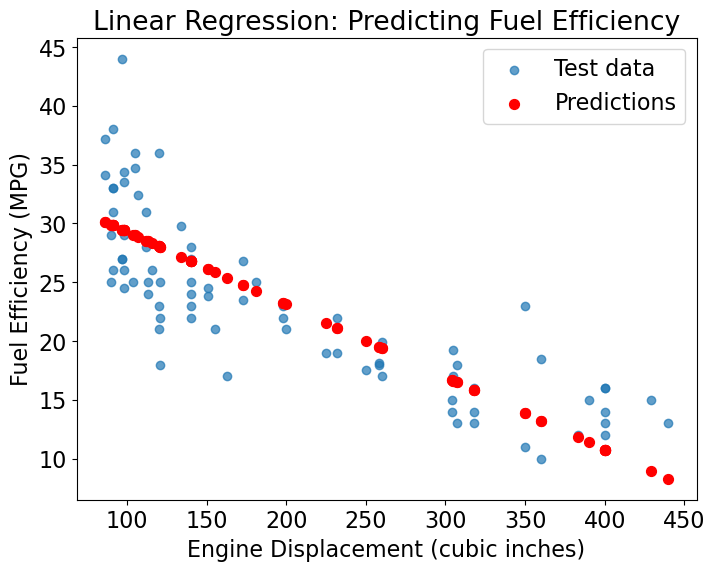

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Load dataset
data = fetch_openml("autoMpg", version=1, as_frame=True)
df = data.frame

# Select X and y correctly
X = df[['displacement']].values  # feature
y = data.target.values  # target

# Visualize
plt.figure(figsize=(8,6))
plt.scatter(X, y, alpha=0.7)
plt.xlabel("Engine Displacement (cubic inches)")
plt.ylabel("Fuel Efficiency (MPG)")
plt.title("Engine Size vs Fuel Efficiency")
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.3f}")

# Visualize predictions
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, label="Test data", alpha=0.7)
plt.scatter(X_test, y_pred, color='red', label="Predictions", s=50)
plt.xlabel("Engine Displacement (cubic inches)")
plt.ylabel("Fuel Efficiency (MPG)")
plt.title("Linear Regression: Predicting Fuel Efficiency")
plt.legend()
plt.show()


# Training Classifiers: Logistic Regression & Neural Network

In this part, we will:

- Generate synthetic classification data using `scikit-learn`.
- Visualize the data.
- Train two classifiers: 
    - Logistic Regression
    - Multi-Layer Perceptron (Neural Network)
- Visualize decision boundaries of both models.

---

> We will use `make_classification` to create 2D data that we can easily plot and analyze.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

## Generate and Visualize Dataset

We generate a 2D binary classification dataset using `make_classification`.

- `n_samples`: number of data points.
- `n_features`: number of features (we use 2 for visualization).
- `n_informative`: number of informative features.
- `class_sep`: controls how easily separable the classes are.
- `random_state`: for reproducibility.


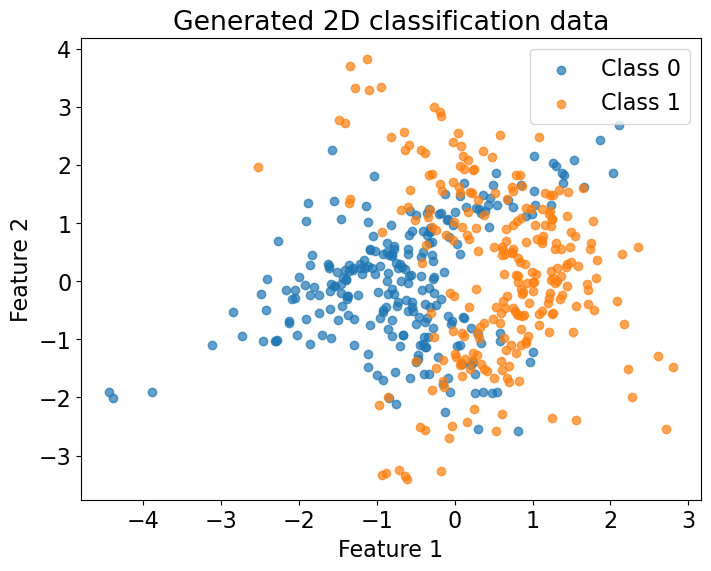

In [13]:
# Generate dataset
x, y = make_classification(
    n_samples=500, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_classes=2,
    class_sep=0.6, 
    random_state=1123344,
)

# Visualize dataset
plt.figure(figsize=(8,6))
plt.scatter(x[y==0, 0], x[y==0, 1], label='Class 0', alpha=0.7)
plt.scatter(x[y==1, 0], x[y==1, 1], label='Class 1', alpha=0.7)
plt.title("Generated 2D classification data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## Training a model and drawing the decision boundary

We will now:

- Train a Logistic Regression model.
- Use `meshgrid` and `contourf` to draw its decision boundary.
- Then repeat the same for `MLPClassifier` (Neural Network).
- Finally, we will compare how linear vs nonlinear models behave.

**Key idea**: Logistic Regression can only create linear boundaries, while Neural Networks can learn non-linear boundaries.

In [14]:

# Train Logistic Regression
logreg = LogisticRegression()
logreg.fit(x, y)

# Predict and calculate accuracy
y_pred_logreg = logreg.predict(x)
acc_logreg = accuracy_score(y, y_pred_logreg)
print(f"Logistic Regression accuracy: {acc_logreg:.2f}")

Logistic Regression accuracy: 0.77


In [15]:
# Train MLP (Neural Network)
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=2000, random_state=42)
mlp.fit(x, y)

# Predict and calculate accuracy
y_pred_mlp = mlp.predict(x)
acc_mlp = accuracy_score(y, y_pred_mlp)
print(f"Neural Network (MLP) accuracy: {acc_mlp:.2f}")

Neural Network (MLP) accuracy: 0.84


In [16]:
# Create a meshgrid
def make_grid_feature_vectors(axis_size=200):
    x1_range = np.linspace(-5, 5, axis_size)
    x2_range = np.linspace(-5, 5, axis_size)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    feature_vectors = np.c_[x1_grid.ravel(), x2_grid.ravel()]
    return x1_range, x2_range, feature_vectors, x1_grid, x2_grid


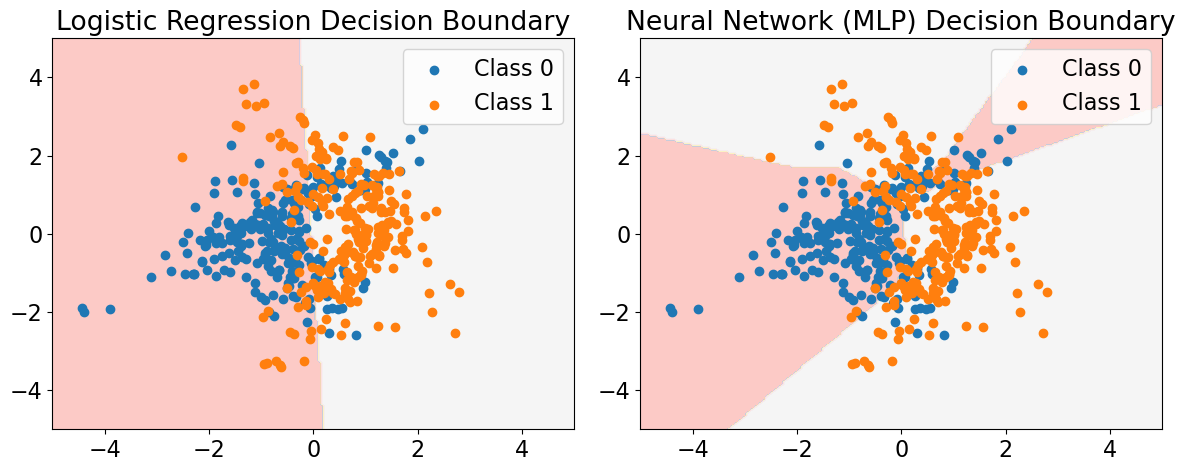

In [17]:
# Create grid
x1_range, x2_range, feature_vectors, x1_grid, x2_grid = make_grid_feature_vectors()

# Predict for each classifier
z_logreg = logreg.predict(feature_vectors).reshape(x1_grid.shape)
z_mlp = mlp.predict(feature_vectors).reshape(x1_grid.shape)

# Plot Logistic Regression
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.contourf(x1_range, x2_range, z_logreg, cmap='Pastel1', alpha=0.7)
plt.scatter(x[y==0, 0], x[y==0, 1], label='Class 0')
plt.scatter(x[y==1, 0], x[y==1, 1], label='Class 1')
plt.title("Logistic Regression Decision Boundary")
plt.legend()

# Plot Neural Network
plt.subplot(1,2,2)
plt.contourf(x1_range, x2_range, z_mlp, cmap='Pastel1', alpha=0.7)
plt.scatter(x[y==0, 0], x[y==0, 1], label='Class 0')
plt.scatter(x[y==1, 0], x[y==1, 1], label='Class 1')
plt.title("Neural Network (MLP) Decision Boundary")
plt.legend()

plt.tight_layout()
plt.show()

## Summary

- Logistic Regression draws a straight linear boundary between classes.
- Neural Network (MLP) can fit non-linear complex boundaries.
- By changing parameters of `make_classification()` you can create more challenging datasets.

 **Your homework**: try changing:
- `class_sep` to make classes more/less separable.
- `n_informative` to add noise.
- `random_state` to generate different datasets.


### Exercise: Non-linear Classification using Logistic Regression and Neural Network

Problem Description: You are given a non-linear binary classification problem where two classes are shaped like interleaving moons (non-linearly separable data).

Your goal is to:
- Train two classifiers:
- Logistic Regression
- Neural Network (MLPClassifier)
- Compare their performance and visualize their decision boundaries.

1. Generate the dataset using make_moons() function from sklearn.datasets:
Use n_samples=500, noise=0.2, and random_state=42.
2. Visualize the dataset using scatter plot, color-coded by class.
3. Train a Logistic Regression model on the full dataset and compute its accuracy.
4. Train a Neural Network (MLPClassifier) on the same data with:
MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=2000, random_state=42)
and compute its accuracy.
5. Build a meshgrid covering the input space and visualize the decision boundaries of both models side-by-side.


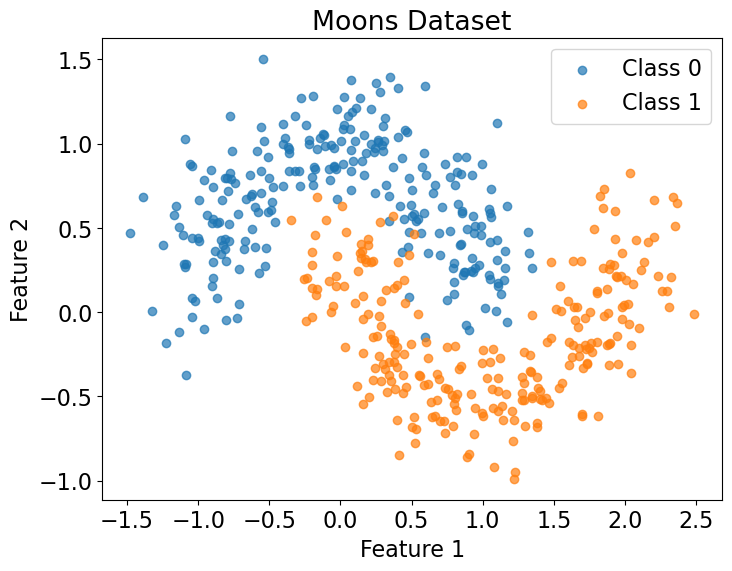

Logistic Regression accuracy: 0.86
Neural Network (MLP) accuracy: 0.99


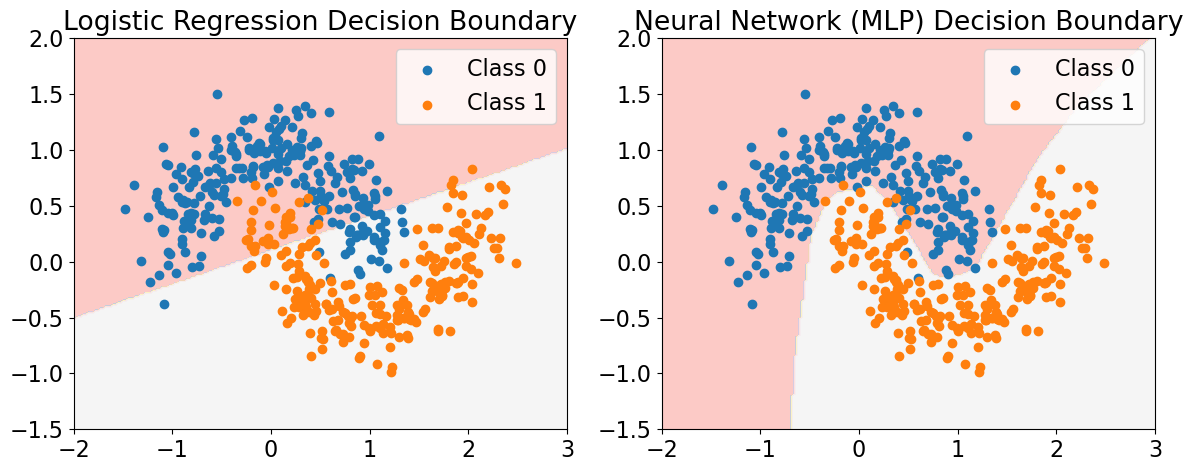

In [25]:
# 1. Generate dataset
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# 2. Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(x[y==0, 0], x[y==0, 1], label='Class 0', alpha=0.7)
plt.scatter(x[y==1, 0], x[y==1, 1], label='Class 1', alpha=0.7)
plt.title("Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# 3. Train Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x, y)
y_pred_logreg = logreg.predict(x)
acc_logreg = accuracy_score(y, y_pred_logreg)
print(f"Logistic Regression accuracy: {acc_logreg:.2f}")

# 4. Train MLPClassifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=2000, random_state=42)
mlp.fit(x, y)
y_pred_mlp = mlp.predict(x)
acc_mlp = accuracy_score(y, y_pred_mlp)
print(f"Neural Network (MLP) accuracy: {acc_mlp:.2f}")

# 5. Create meshgrid and visualize decision boundaries
import numpy as np

def make_grid_feature_vectors(axis_size=200):
    x1_range = np.linspace(-2, 3, axis_size)
    x2_range = np.linspace(-1.5, 2, axis_size)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    feature_vectors = np.c_[x1_grid.ravel(), x2_grid.ravel()]
    return x1_range, x2_range, feature_vectors, x1_grid, x2_grid

x1_range, x2_range, feature_vectors, x1_grid, x2_grid = make_grid_feature_vectors()

z_logreg = logreg.predict(feature_vectors).reshape(x1_grid.shape)
z_mlp = mlp.predict(feature_vectors).reshape(x1_grid.shape)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.contourf(x1_range, x2_range, z_logreg, cmap='Pastel1', alpha=0.7)
plt.scatter(x[y==0, 0], x[y==0, 1], label='Class 0')
plt.scatter(x[y==1, 0], x[y==1, 1], label='Class 1')
plt.title("Logistic Regression Decision Boundary")
plt.legend()

plt.subplot(1,2,2)
plt.contourf(x1_range, x2_range, z_mlp, cmap='Pastel1', alpha=0.7)
plt.scatter(x[y==0, 0], x[y==0, 1], label='Class 0')
plt.scatter(x[y==1, 0], x[y==1, 1], label='Class 1')
plt.title("Neural Network (MLP) Decision Boundary")
plt.legend()

plt.tight_layout()
plt.show()
